In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import pickle
import time
from scipy import stats



In [41]:
address_main = '/inversions VS rhos/'
address_pickle = address_main + 'inversions_VS_rhos_200.pickle'

address_save_figures = address_main 

In [42]:

roh_step_size = 0.01
size_data = 200
number_of_lines = 100
number_of_runs = 200

rohs = np.arange(0,1+roh_step_size,roh_step_size)

max_inversions = number_of_lines*(number_of_lines-1)/2
print(max_inversions)

4950.0


# One Code for Mutiple Runs

# recovering the results of the last run

In [43]:
#with open(address_save_results + '/filename.pickle', 'rb') as handle:
#    [save_inversions_F1_h_2, save_inversions_LEE_2] = pickle.load(handle)

In [44]:
with open(address_pickle, 'rb') as handle:
    [save_inversions_F1_h_2, save_inversions_LEE_2] = pickle.load(handle)

In [45]:
for key in save_inversions_F1_h_2.keys() :
    save_inversions_F1_h_2[key] = [100*x/max_inversions for x in save_inversions_F1_h_2[key]]

In [46]:
for key in save_inversions_LEE_2.keys() :
    save_inversions_LEE_2[key] = [100*x/max_inversions for x in save_inversions_LEE_2[key]]

## Making Graphics

#### calculating quantiles

In [47]:
percentiles = range(0,101,10)
#for p in  percentiles:
#    print(p)

In [48]:
inversions_F1_h_percentiles ={}

for p in percentiles:
    inversions_F1_h_percentiles[p] = []
    
for key in save_inversions_F1_h_2.keys() :    
    for p in percentiles:
        inversions_F1_h_percentiles[p].append(np.percentile(save_inversions_F1_h_2[key],p))


In [49]:
inversions_LEE_percentiles ={}

for p in percentiles:
    inversions_LEE_percentiles[p] = []
    
for key in save_inversions_LEE_2.keys() :    
    for p in percentiles:
        inversions_LEE_percentiles[p].append(np.percentile(save_inversions_LEE_2[key],p))



In [51]:
Pvalues=[]
print('rho  -->  P-value' )
for key in save_inversions_LEE_2.keys():
    x = save_inversions_LEE_2[key]
    y = save_inversions_F1_h_2[key]
    p_val = stats.wilcoxon(x, y).pvalue
    Pvalues.append(100*p_val)
    print(key , ' -->' , round(p_val,5))


rho  -->  P-value
0.0  --> nan
0.01  --> 0.55029
0.02  --> 0.05528
0.03  --> 0.08078
0.04  --> 0.93112
0.05  --> 0.04062
0.06  --> 0.00579
0.07  --> 0.06827
0.08  --> 0.22807
0.09  --> 0.0008
0.1  --> 7e-05
0.11  --> 0.0
0.12  --> 0.0
0.13  --> 0.0
0.14  --> 0.0
0.15  --> 0.0
0.16  --> 0.0
0.17  --> 0.0
0.18  --> 0.0
0.19  --> 0.0
0.2  --> 0.0
0.21  --> 0.0
0.22  --> 0.0
0.23  --> 0.0
0.24  --> 0.0
0.25  --> 0.0
0.26  --> 0.0
0.27  --> 0.0
0.28  --> 0.0
0.29  --> 0.0
0.3  --> 0.0
0.31  --> 0.0
0.32  --> 0.0
0.33  --> 0.0
0.34  --> 0.0
0.35000000000000003  --> 0.0
0.36  --> 0.0
0.37  --> 0.0
0.38  --> 0.0
0.39  --> 0.0
0.4  --> 0.0
0.41000000000000003  --> 0.0
0.42  --> 0.0
0.43  --> 0.0
0.44  --> 0.0
0.45  --> 0.0
0.46  --> 0.0
0.47000000000000003  --> 0.0
0.48  --> 0.0
0.49  --> 0.0
0.5  --> 0.0
0.51  --> 0.0
0.52  --> 0.0
0.53  --> 0.0
0.54  --> 0.0
0.55  --> 0.0
0.56  --> 0.0
0.5700000000000001  --> 0.0
0.58  --> 0.0
0.59  --> 0.0
0.6  --> 0.0
0.61  --> 0.0
0.62  --> 0.0
0.63  --> 0

/Users/vu/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2397: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")
/Users/vu/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2422: RuntimeWarning: invalid value encountered in double_scalars
  z = (T - mn - correction) / se


In [52]:
#Pvalues[11] = Pvalues[11]/2


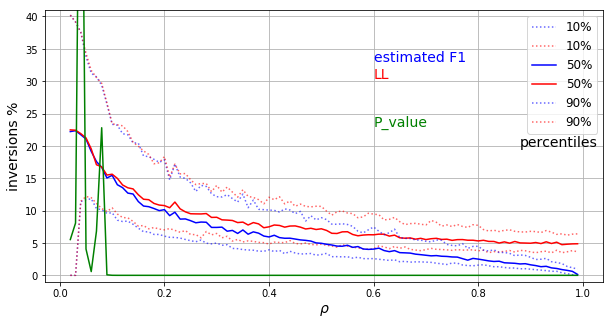

In [69]:
plt.figure(figsize=(10,5))

for p in [10,50,90]:
    if p == 50:
        linestyle = '-'
    else:
        linestyle = ':'
        
    plt.plot(np.arange(0.02,1,0.01),inversions_F1_h_percentiles[p][2:100], c='b', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)
    plt.plot(np.arange(0.02,1,0.01),inversions_LEE_percentiles[p][2:100], c='r', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)

plt.text(x=0.88,y=20,s="percentiles",color='k',fontsize=14)    
plt.text(x=0.60,y=33,s="estimated F1",color='b',fontsize=14)
plt.text(x=0.60,y=30.5,s="LL",color='r',fontsize=14)  
plt.text(x=0.60,y=23,s="P_value",color='g',fontsize=14)  

plt.ylim(-1,41)

plt.grid(axis='both')
plt.xlabel(r'$\rho$',fontsize=14)
plt.ylabel('inversions %',fontsize=14)

percentiles = [10,50,90]
leg = [None]*(len(percentiles)*2)
leg[::2] = percentiles
leg[1::2] = percentiles

leg = [str(x)+'%' for x in  leg]


plt.legend( leg ,fontsize=12)
plt.plot(np.arange(0.02,1,0.01),Pvalues[2:100],c='g')


plt.savefig(address_save_figures+'inversion_VS_rho(with_Pval).png')
plt.show()

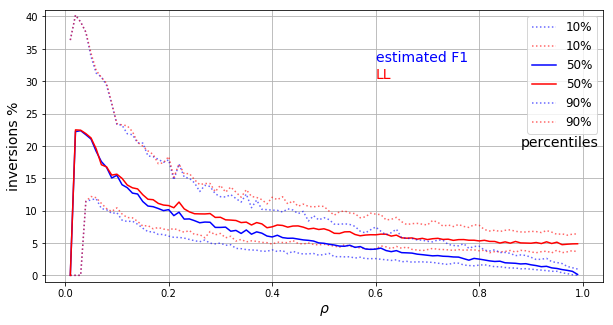

In [70]:
plt.figure(figsize=(10,5))

for p in [10,50,90]:
    if p == 50:
        linestyle = '-'
    else:
        linestyle = ':'
        
    plt.plot(np.arange(0.01,1,0.01),inversions_F1_h_percentiles[p][1:100], c='b', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)
    plt.plot(np.arange(0.01,1,0.01),inversions_LEE_percentiles[p][1:100], c='r', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)

plt.text(x=0.88,y=20,s="percentiles",color='k',fontsize=14)    
plt.text(x=0.60,y=33,s="estimated F1",color='b',fontsize=14)
plt.text(x=0.60,y=30.5,s="LL",color='r',fontsize=14)  


plt.ylim(-1,41)

plt.grid(axis='both')
plt.xlabel(r'$\rho$',fontsize=14)
plt.ylabel('inversions %',fontsize=14)

percentiles = [10,50,90]
leg = [None]*(len(percentiles)*2)
leg[::2] = percentiles
leg[1::2] = percentiles

leg = [str(x)+'%' for x in  leg]


plt.legend( leg ,fontsize=12)


plt.savefig(address_save_figures+'inversion_VS_rho(without_Pval).png')
plt.show()

In [ ]:
#Figure 4

# TEST

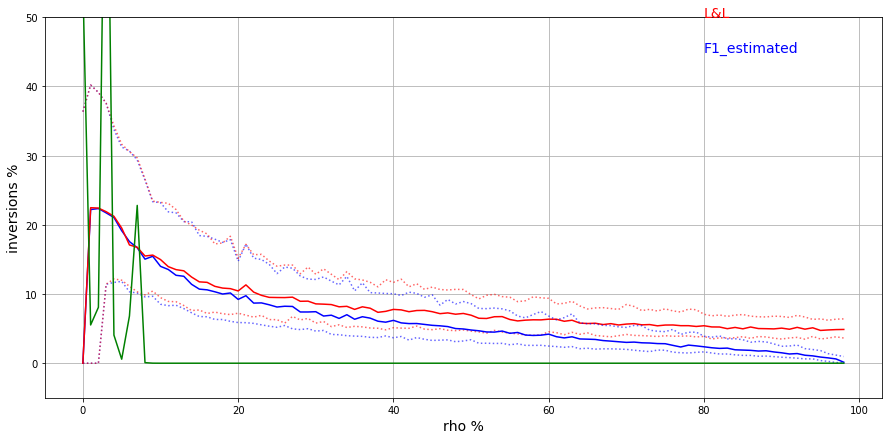

In [38]:
plt.figure(figsize=(15,7))

for p in percentiles:
    if p == 50:
        linestyle = '-'
    else:
        linestyle = ':'
        
    plt.plot(inversions_F1_h_percentiles[p][1:100], c='b', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)
    plt.plot(inversions_LEE_percentiles[p][1:100], c='r', alpha = max(0.6,1- abs(50-p)/50), linestyle=linestyle)

plt.text(x=80,y=45,s="F1_estimated",color='b',fontsize=14)
plt.text(x=80,y=50,s="L&L",color='r',fontsize=14)  

plt.ylim(-5,50.0)

plt.grid(axis='both')
plt.xlabel('rho %',fontsize=14)
plt.ylabel('inversions %',fontsize=14)


leg = [None]*(len(percentiles)*2)
leg[::2] = percentiles
leg[1::2] = percentiles

leg = [str(x)+'%' for x in  leg]
#leg = [str(x)+'%' for x in  percentiles] #for one of two algorithems

#plt.legend( leg ,fontsize=12)


plt.plot(Pvalues[1:100],c='g')

plt.show()


